In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [74]:
# Load data
images = np.load("Data/sample_200_image.npy")
labels = np.load("Data/sample_200_label.npy")
# Normalize image data.  0-255 to 0-1
images = images / 255
df = pd.DataFrame(np.concatenate((images, labels), axis=1))
# Rename the last column as "label"
df.rename(columns={784:"label"}, inplace=True)
# Convert label column to integer type
df['label'] = df['label'].astype('int64')

In [110]:
# Display the first 10 rows in the data frame
df.iloc[0:10, :]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [139]:
# Get "img" data frame and "lbl" series from the df
img = df.iloc[:, 0:-1]
lbl = df['label']
# Split into train, validation and test set
x_train1, x_test, y_train1, y_test = train_test_split(img, lbl, test_size = 0.10, random_state = 123, stratify = lbl)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size = 0.2, random_state = 123, stratify = y_train1)

In [144]:
# Reset all the indices (from 0 to length-1)
x_train.reset_index(drop=True, inplace=True)
x_valid.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_valid.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [167]:
from sklearn.decomposition import PCA

In [168]:
# Feature proprocessing and dimensionality reduction (PCA)
pca = PCA(n_components=784)
data_pca = pca.fit_transform(x_train)

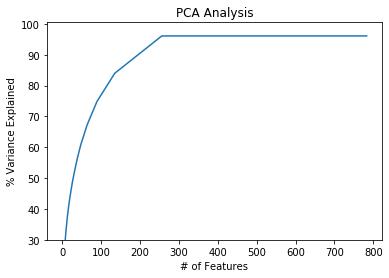

In [169]:
# Plot pca graph
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [170]:
np.argmax(var)

256

In [192]:
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train)
print(x_train_pca.shape)
print(x_train.shape)

(49680, 100)
(49680, 784)


In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [199]:
# Fit SVM models & tuning parameters
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC()),))

In [200]:
svm_clf.fit(x_train_pca, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [201]:
x_valid_pca = pca.transform(x_valid)
pred_valid = svm_clf.predict(x_valid_pca)

In [202]:
np.mean(pred_valid == y_valid)

0.26666666666666666

In [203]:
pred_train = svm_clf.predict(x_train_pca)

In [204]:
np.mean(pred_train == y_train)

0.7523148148148148

In [206]:
x_test_pca = pca.transform(x_test)

In [207]:
pred_test = svm_clf.predict(x_test_pca)

In [208]:
np.mean(pred_test == y_test)

0.27260869565217394

In [ ]:
# Select the best model & evaluate on the test set